In [106]:
import numpy as np
import pandas as pd
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Examen Final

Cargamos los datos, buscamos las acciones que tengan mejor rendimiento anual y con las estas construiremos nuestro portafolio
de 7 acciones, ademas guardamos MEXBOL como la accion de referencia

In [4]:
Precios=pd.read_excel("Prueba.xlsx",index_col=0)

In [196]:
RendTot=Precios.pct_change().dropna(axis=0).mean()*252
RendMejores=RendTot.sort_values(ascending= False).head(7)

In [197]:
AccExamen=Precios[list(RendMejores.index)]
AccRef=Precios.iloc[:,-1]
AccCAPM=pd.concat([AccExamen,AccRef],axis=1)
Rend=AccExamen.pct_change().dropna(axis=0)
RendCAPM=AccCAPM.pct_change().dropna(axis=0)
Rend

,ELEKTRA* MF Equity,OMAB MF Equity,BOLSAA MF Equity,WALMEX* MF Equity,GAPB MF Equity,GCC* MF Equity,GMEXICOB MF Equity
DATE,,,,,,,
2016-01-04,-0.028018,-0.022007,-0.012686,-0.014946,-0.022887,-0.029011,-0.029356
2016-01-05,-0.030183,-0.002324,0.000000,-0.004202,-0.004308,0.000000,0.020722
2016-01-06,-0.040974,0.005516,-0.003988,-0.006564,-0.006354,0.000000,-0.024143
2016-01-07,-0.024835,-0.013288,-0.024021,-0.056395,-0.038574,-0.017237,-0.015744
2016-01-08,-0.013617,-0.016185,-0.017320,0.026007,0.017124,0.000000,-0.024279
2016-01-11,0.037712,0.007409,-0.004174,0.041433,0.008348,-0.012862,0.000000
2016-01-12,-0.008040,0.020568,-0.008384,0.004447,-0.005382,0.000000,0.027225
2016-01-13,-0.013087,0.001588,0.004697,0.007223,0.017619,0.000000,0.004275
2016-01-14,-0.012095,-0.012439,0.031323,0.017812,-0.005794,0.018716,0.000000


### 1. Rendimiento Esperado Diario y Anual

#### a) Modelo de Rendimiento Promedio Constante 

In [266]:
Diario=Rend.mean()
Anual=Diario*252

In [267]:
Diario

ELEKTRA* MF Equity    0.001455
OMAB MF Equity        0.000631
BOLSAA MF Equity      0.000719
WALMEX* MF Equity     0.000327
GAPB MF Equity        0.000507
GCC* MF Equity        0.000885
GMEXICOB MF Equity    0.000531
dtype: float64

In [268]:
Anual

ELEKTRA* MF Equity    0.366774
OMAB MF Equity        0.158900
BOLSAA MF Equity      0.181224
WALMEX* MF Equity     0.082426
GAPB MF Equity        0.127830
GCC* MF Equity        0.223084
GMEXICOB MF Equity    0.133839
dtype: float64

In [199]:
np.random.seed(150)
w = np.random.random(size=7)
w = w / w.sum()

In [200]:
Diario_Port=np.dot(w.T,Diario)
Diario_Port

0.0007424541172457359

In [201]:
Anual_Port=Diario_Port*252
Anual_Port

0.18709843754592545

#### b) CAPM

##### i) Beta de cada Accion

In [202]:
Phi = RendCAPM.iloc[:, :-1].values
t = RendCAPM.iloc[:, [-1]]
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

In [203]:
P = np.ones((N, M))
P = np.c_[P, Phi]

In [204]:
W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W["security"]  = np.concatenate([RendCAPM.columns[:-1]] * 2)
W["param"] = ["alpha"] * M + ["beta"] * M
B = W.pivot_table(index="security", columns="param", values="MEXBOL INDEX")

In [205]:
B.sort_values("beta", ascending=False)

param,alpha,beta
security,,
WALMEX* MF Equity,-0.000024,0.291118
GAPB MF Equity,-0.000072,0.282531
OMAB MF Equity,-0.000092,0.259061
GMEXICOB MF Equity,-0.000058,0.244111
BOLSAA MF Equity,-0.000038,0.152271
GCC* MF Equity,-0.000027,0.110661
ELEKTRA* MF Equity,-0.000019,0.062163


Despues de encontrar las Betas de cada accion calculamos su rendimiento esperado. La tasa libre de riesgo (LR) es 5% y
el premio por riesgo es de 10%

In [233]:
LR=.05
PM=.1
CAPM= LR+PM*B[["beta"]]
CAPM

param,beta
security,
BOLSAA MF Equity,0.065227
ELEKTRA* MF Equity,0.056216
GAPB MF Equity,0.078253
GCC* MF Equity,0.061066
GMEXICOB MF Equity,0.074411
OMAB MF Equity,0.075906
WALMEX* MF Equity,0.079112


##### ii)Acciones Defensivas y Agresivas

La Beta para todas las acciones es menor a 1 por lo que podemos definir que tenemos acciones exclusivamente Defensivas

### 2. Matriz de Varianza-Covarianza

In [270]:
Rend.cov()

,ELEKTRA* MF Equity,OMAB MF Equity,BOLSAA MF Equity,WALMEX* MF Equity,GAPB MF Equity,GCC* MF Equity,GMEXICOB MF Equity
ELEKTRA* MF Equity,4.283130e-04,0.000026,0.000010,0.000028,0.000017,0.000005,-7.371033e-07
OMAB MF Equity,2.585833e-05,0.000253,0.000045,0.000051,0.000131,0.000025,6.281504e-05
BOLSAA MF Equity,9.889090e-06,0.000045,0.000278,0.000023,0.000043,0.000022,4.450066e-05
WALMEX* MF Equity,2.820605e-05,0.000051,0.000023,0.000215,0.000046,0.000017,4.870073e-05
GAPB MF Equity,1.683988e-05,0.000131,0.000043,0.000046,0.000233,0.000023,6.983020e-05
GCC* MF Equity,5.209483e-06,0.000025,0.000022,0.000017,0.000023,0.000242,3.033839e-05
GMEXICOB MF Equity,-7.371033e-07,0.000063,0.000045,0.000049,0.000070,0.000030,3.251424e-04


### 3. Portafolio de minima varianza y Frontera Eficiente

In [207]:
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [208]:
N, M = Rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0
def rend_esperado(w, E):
    return port_rend(w, Rend) - E # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=Rend)
port0

     fun: 0.13079104974138214
     jac: array([0.13067815, 0.13099781, 0.13100658, 0.13045856, 0.13068025,
       0.13092866, 0.13091244])
 message: 'Optimization terminated successfully.'
    nfev: 100
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.12967046, 0.08182324, 0.15939311, 0.19679782, 0.11722328,
       0.21849035, 0.09660174])

In [209]:
wp0 = port0.x
port_rend(wp0, Rend), port_vol(wp0, Rend)

(0.18232406340864785, 0.13079104974138214)

In [210]:
wp0

array([0.12967046, 0.08182324, 0.15939311, 0.19679782, 0.11722328,
       0.21849035, 0.09660174])

In [238]:
r_min = port_rend(wp0, Rend)
r_max = Anual.max()

rend_max = np.linspace(r_min, r_max)

In [239]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)}
    ]

    port1 = minimize(port_vol, w0, constraints=constraints, args=Rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

Graficamos la frontera eficiente y el portafolio de minima varianza (en naranja)

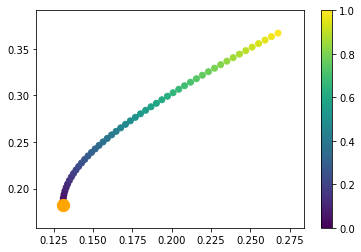

In [240]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, Rend))
    v_opt.append(port_vol(w, Rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.scatter(port_vol(wp0, Rend),port_rend(wp0, Rend),c="orange",s=150)
plt.colorbar()

### 4. Portafolio Riesgoso Optimo

In [226]:
rf = 0.05

def min_func_sharpe(weights):
    return - (port_rend(weights, Rend) - rf) / port_vol(weights, Rend)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w, constraints=constraints)

In [227]:
w_sharpe = f_sharpe.x
w_sharpe

array([ 0.36863079,  0.11058621,  0.17846287, -0.05907633,  0.0109171 ,
        0.32716273,  0.06331663])

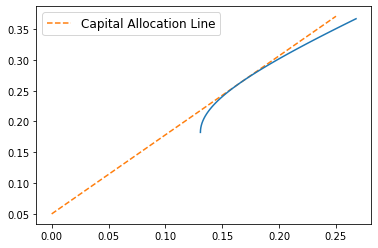

In [228]:
e_sharpe = port_rend(w_sharpe, Rend)
vol_sharpe = port_vol(w_sharpe, Rend)

sigma_c =  np.linspace(0, 0.25)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

### 5. Elige Porcentajes a Invertir en el portafolio Riesgoso  Optimo y el Activo Libre de Riesgo

In [ ]:
Calculamos y_star, que nos indica el porcentaje a invertir en el portafolio riesgoso (.8615) y el porcentaje para 
el activo libre de riesgo, 1-y_star (.1385)

In [260]:
A=3
E_PRLR=w_sharpe*CAPM.values.T
E_PRLR=E_PRLR.sum()

In [261]:
y_star=E_PRLR/(A*vol_sharpe**2)
y_star

0.8615402034593238

In [262]:
1-y_star

0.1384597965406762

### 6. En que caso utilizarias una Red Neuronal

Valdria la pena utilizar una Red Neuronal si nuestro volumen de datos es demasiado grande

### 7. En que casos no utilizarias una Red Neuronal

Una red neruonal no es necesaria si tenemos un modelo mas sencillo con menos datos que analizar 

### 8.Menciona tres funciones de activacion para una Red Neuronal Feed-Forward

Sigmoidal, Tangente Hiperbolica y ReLU

### 9. Que es el metodo de backpropagation

Es un metodo para calcular el gradiente de una funcion de costos con respecto a los pesos asignados a nuestra red neuronal. 
El calculo se hace de atras hacia adelante, (el gradiente de la ultima capa de costos se calcula al principio).

### 10. En que difiere una Red Neuronal Feed-Forward de una Red Neuronal Convolucional

Una Red Neuronal Feed Forward son mas generales, estan compuestas por input-> Hidden Layers  -> Output. Y aunque cada Layer
tiene conexion con la anterior, solo se mueven en una direccion, no pueden entrar en un ciclo.
Una Red Neuronal Convolucional tiene tres dimensiones, no todos los nodos de un layer se conectan necesariamente con el
siguiente. Son utilizadas mas comunmente para el procesamiento de imagenes y video.